# Fan In Fan Out Pilot Summary

Jonathan Nicholas and Daphna Shohamy

07/09/2018

---

### Initial Design

The task was programmed in PsychoPy following the specifications reported for sensory preconditioning in Wimmer & Shohamy, 2012. Neutrally rated face images were chosen from the Chicago Face Database and were matched to Columbia undergraduate demographics (race/gender). Scenes were chosen from Konkle, Brady, Alvarez, & Oliva, 2012 (Psych Science). Objects were chosen from Brady, Konkle, Alvarez, & Oliva, 2008 (PNAS).

<img src="fifo_design_fig.png" width="400">

The experiment consisted of the following procedure:

- **Image rating** (50 faces, 50 scenes, 50 objects) on a continuous "liking" scale. The most neutral images are then chosen to be presented in the task. Time: 10 minutes
- **Conditioning phase.** Trials: 160 total; 10/pair with 16 pairs. Time: 25 minutes
- **Reward learning phase.** Trials: 160 total; 20/pair with 8 pairs. Time: 30 minutes
- **Decision phase.** Trials: 96 total; 4/image combination. Time: 20 minutes
- **Memory and post-liking assessment.** Time: 5 minutes
###### Total Time: 90 minutes

#### Changes from Wimmer & Shohamy, 2012:

- Instead of detecting upside images during the conditioning phase, we opted to have participants indicate the category of the image in order to bring greater attention to the category distinction
- FIFO has two trial types (fan in; fan out). In order to have multiple A->C pairs/type, there are 16 pairs in total (2/category/type)
- There is no visual distinction between A and C images beyond the category (whereas in Wimmer & Shohamy the C images were all circular fractals)
- All phases are longer due to having multiple trial types




## Pilot 1: N=7 SONA participants

#### 02/07/18 - 02/13/18

The experiment was run in Testing Room A on a 2009 Mac Pro. 7 SONA participants were recruited for initial piloting. SONA participants were informed that they should try and maximize earned points since they would not be receiving monetary compensation.

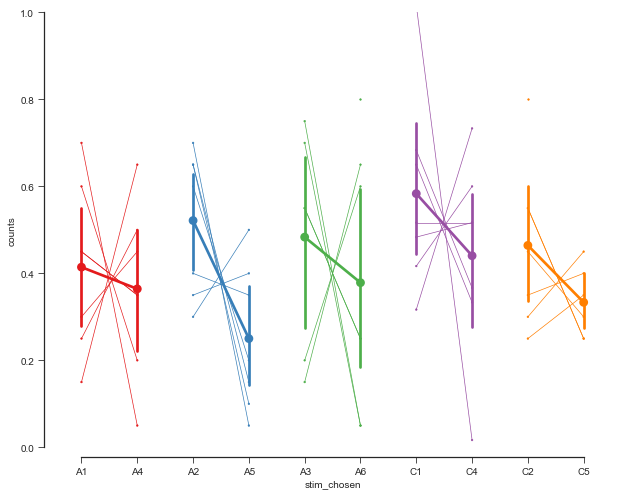

In [16]:
pids = range(1,8)

mainData = pd.read_csv(os.path.join(expPath,"fullDataSONA1.csv"))

plotChoiceData(mainData=mainData,dSet="SONA1")

#### Results

Participants did not reliably learn the conditioned stimuli (C1 v C4; C2 v C5). Post-task questionnaires indicated that most were choosing based on criteria other than which they thought was most likely to lead to receiving a point. Thus, we changed the instructions to indicate that they should choose **only** based on this.

--- 

## Pilot 2: N=9 SONA participants

#### 02/14/18 - 02/28/18

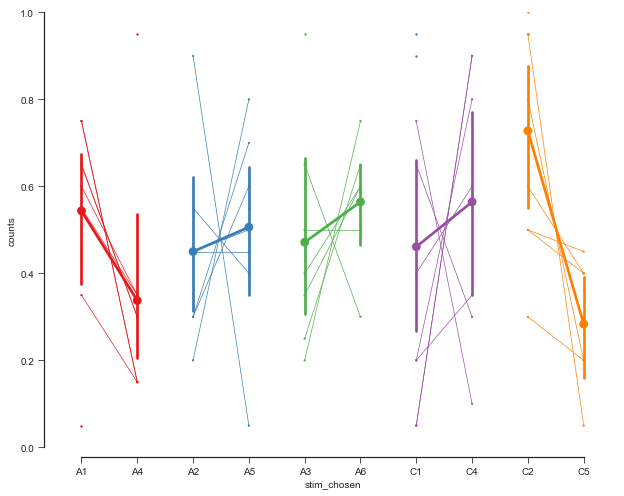

In [27]:
pids = ["008","009","010","011","013","014","015","016","017"]

mainData = loadData(dType="main")

plotChoiceData(mainData=mainData)

#### Results

Participants learn conditioned face stimuli but not conditioned object stimuli. Performance is still widely variable, however, and data quality was generally low (participants not included in this figure: 1 reported responding randomly, 1 reported falling asleep during reward learning, and there were 6 no shows).

Several changes were made following this second SONA pilot:

- Paid participants were used instead of SONA participants
- The probability of receiving reward was changed from 80% to 100%
- Conditioning trials were increased from 20 to 25
- Rather than having participants rate images, we pre-selected "neutral" and discriminable images:
    - 8 neutral faces (matching Columbia demographics) were selected at random
    - 8 scenes that tended to be rated the most neutral by participants were selected
    - 8 neutrally rated and more discriminable objects were chosen from the Open Affective Standardized Image Set (OASIS)

--- 

## Pilot 3: N=16 paid participants

#### 03/01/18 - 05/15/18

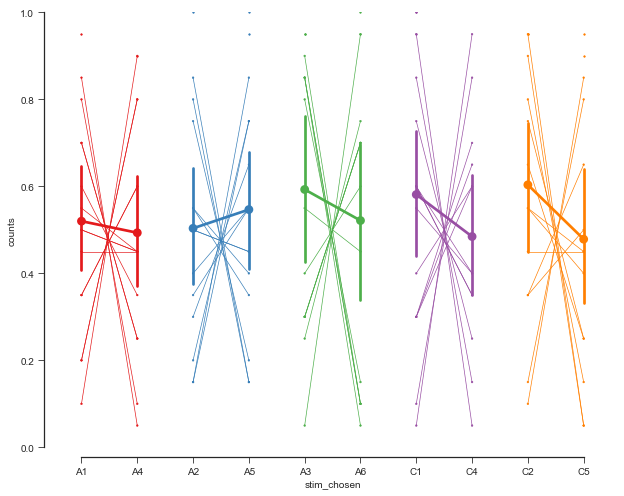

In [30]:
pids = ["100","101","103","104","105","106","107","108","109","110","111","112","113","114","115","116"]

mainData = loadData(dType="main")

plotChoiceData(mainData=mainData)

#### Results

Participants did not reliably learn the conditioned stimuli (C1 v C4; C2 v C5). Additionally, pre-selecting the face images seemed to make it more difficult for participants to learn the reward-face association that was shown in pilot 2. In order to assess whether the pre-selected stimuli are actually learnable, we conducted a fourth pilot with no sensory preconditioning phase. Thus, this experiment consisted of only a reward learning phase and a decision phase.

--- 


## Pilot 4: N=7 paid participants
### Conditioning only

#### 05/15/18 - 06/01/18

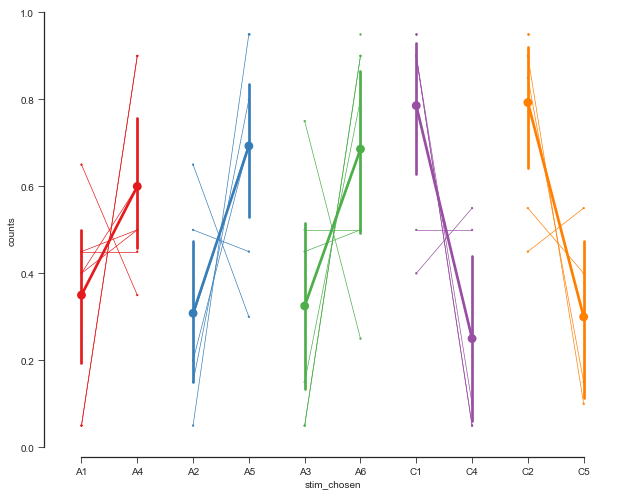

In [32]:
pids = ["200","201","202","203","204","205","206"]

mainData = loadData(dType="main")

plotChoiceData(mainData=mainData)

#### Results

Participants are able to learn the conditioned stimuli when there is no sensory preconditioning phase. All other choices are at random, which is expected since there is no preconditioning.

In addition, it was found that while running other processes, the computer in Testing Room A has unreliable stimulus presentation times. This resulted in, roughly, an average loss of .5 seconds per trial. Since there was more availability in other testing rooms, the experiment was moved to a different computer with confirmed reliable stimulus presentation timing.

--- 

## Pilot 5: N=10 paid participants

#### 06/01/18 - 07/01/18

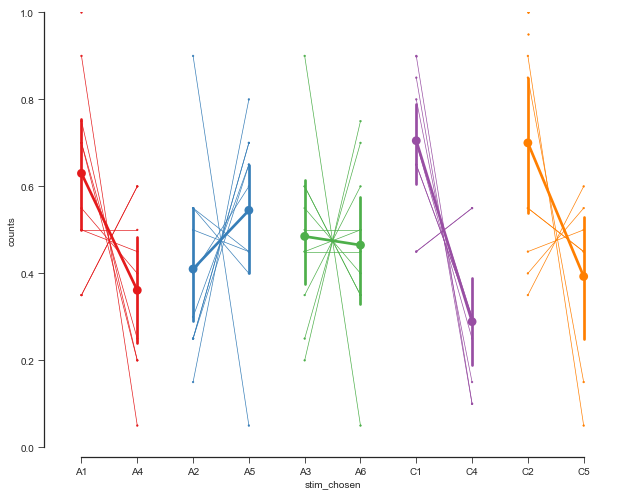

In [33]:
pids = ["300","301","302","303","304","305","306","307","308","309"]

mainData = loadData(dType="main")

plotChoiceData(mainData=mainData)

#### Results

Participants are now able to learn the conditioned stimuli in the full sensory preconditioning experiment. Choices are currently near random for the preconditioned stimuli, with a slight preference for the preconditioned faces.

--- 

###### All functions used to generate the above plots are below

In [29]:
# Importing packages
%matplotlib inline
from __future__ import division
import warnings, os
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

global expPath
global pids

expPath = "/Users/jonathan/shohamylab/fwdbwd/"

def loadData(dType=None,dataDir="data",fileType="stateData"):
    '''
    
    Load individual participant data into aggregated dataframe
    
    '''
    
    data = []
    for pid in pids:
        pidPath = os.path.join(expPath,dataDir,pid)
        dataFile = [d for d in os.listdir(pidPath) if dType in d and fileType in d][0]
        subData = pd.read_csv(os.path.join(pidPath,dataFile))
        subData["pid"] = [pid] * len(subData)
        data.append(subData)
    data = pd.concat(data,ignore_index=True)
    
    return data


def plotChoiceData(mainData=None,dSet=None,figsize=(10, 8)):
    '''
    
    Plot participant performance during the decision phase
    
    '''
    
    categoryIDs = mainData.groupby(["pid","stimulus1","category1"]).size().reset_index(name="counts")

    choiceData = mainData[mainData.stateName == "choice_phase3"]

    def chosen(row):
        if row["stimulus_position1"] == "(-0.5, 0)":
            if row["key_pressed"] == 1:
                return row["category1"]
            else:
                return row["category2"]
        elif row["stimulus_position1"] == "(0.5, 0)":
            if row["key_pressed"] == 2:
                return row["category1"]
            else:
                return row["category2"]

    choiceData['stim_chosen'] = choiceData.apply(chosen, axis=1)

    # Clean the data
    choiceData = choiceData[pd.notnull(choiceData.key_pressed)]

    plotChoiceDf = choiceData.groupby(["pid","category1","category2","stim_chosen"]).size() \
    .reset_index(name='counts')

    plotChoiceDf["choice"] = plotChoiceDf["category1"]+"_v_"+plotChoiceDf["category2"]

    plotChoiceDf.counts = plotChoiceDf.counts.astype(float)
    for i_row, row in plotChoiceDf.iterrows():

        if row.choice == "C1_v_C4" and dSet == "SONA1":
            numShown = 60
        else:
            numShown = 20

        plotChoiceDf.at[i_row,"counts"] = row.counts/numShown

    sns.set_style("ticks")

    plt.figure(figsize=figsize)
    
    for pid in pids:
        pid_data = plotChoiceDf[plotChoiceDf.pid == pid]

        params = dict(x="stim_chosen",y="counts",hue="choice",
                      data=pid_data,scale=0.25,palette="Set1",
                      order=["A1","A4","A2","A5","A3","A6","C1","C4","C2","C5"])

        ax = sns.pointplot(**params)
        ax.legend_.remove()

    # plot the mean
    params = dict(x="stim_chosen",y="counts",hue="choice",
                  scale=1,palette="Set1",
                  data=plotChoiceDf,
                  order=["A1","A4","A2","A5","A3","A6","C1","C4","C2","C5"])

    ax = sns.pointplot(**params)
    ax.legend_.remove()
    ax.set_ylim([0,1])
    sns.despine(offset=10, trim=True);